In [46]:
import noisereduce as nr
import librosa
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import IPython
# load data
audio, samplerate = librosa.load(r"D:\localNLP\RussianNLP\public_youtube1120_mp3\public_youtube1120\1\0a\00d183e9796b.mp3")

D:\Miniconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


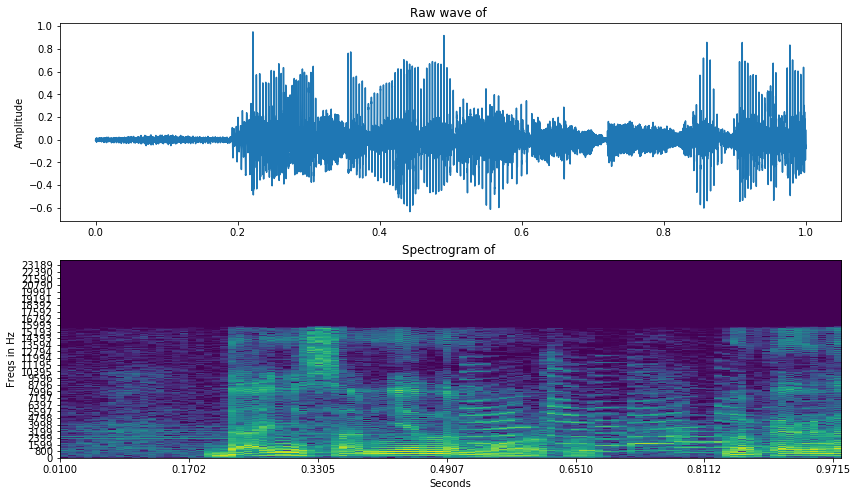

In [47]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

def draw_spec(samples, sample_rate):
    freqs, times, spectrogram = log_specgram(samples, sample_rate)
    fig = plt.figure(figsize=(14, 8))
    ax1 = fig.add_subplot(211)
    ax1.set_title('Raw wave of ')
    ax1.set_ylabel('Amplitude')
    ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

    ax2 = fig.add_subplot(212)
    ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
               extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax2.set_yticks(freqs[::16])
    ax2.set_xticks(times[::16])
    ax2.set_title('Spectrogram of ')
    ax2.set_ylabel('Freqs in Hz')
    ax2.set_xlabel('Seconds')
draw_spec(audio, len(audio))
IPython.display.Audio(data=audio, rate=samplerate)

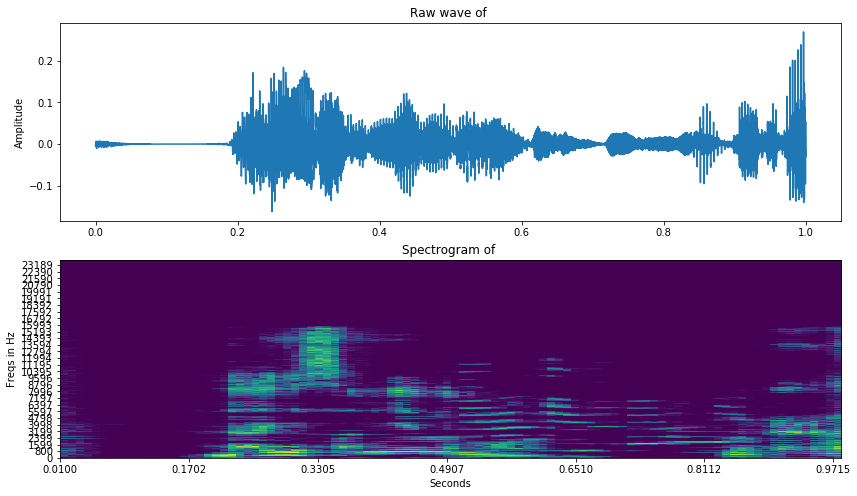

In [48]:
# select section of data that is noise
noisy_part = audio[15000:len(audio)]
# perform noise reduction
reduced_noise = nr.reduce_noise(audio_clip=audio, noise_clip=noisy_part, verbose=False)
draw_spec(reduced_noise, len(reduced_noise))
IPython.display.Audio(data=reduced_noise, rate=samplerate)